In [1]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py

In [3]:
df = pd.read_pickle("/data/new_trap_processed/processed_files/20200320/Bead1/Shaking/Shaking378/Shaking3_aux.pkl") #here one could put the respective file name
height_cal = df["height_cal"]
z_distance = df["z_distance_emp"]

-15.85910039296383

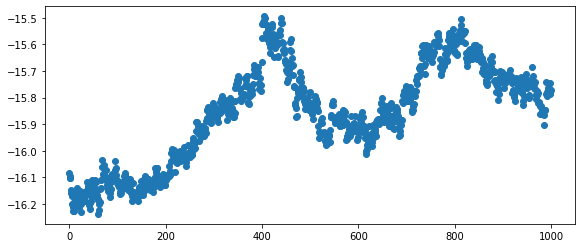

In [4]:
_,ax = plt.subplots(figsize=(9.5,4))
# ax.scatter(range(1000), height_cal[::10])
ax.scatter(range(1000), z_distance[::10])
np.mean(z_distance)

In [4]:
df = pd.read_pickle("/data/new_trap_processed/processed_files/20200320/Bead1/Shaking/Shaking2_20200403/Small_Grid/Shaking376_aux.pkl") #here one could put the respective file name
height_cal2 = df["height_cal"]
z_distance2 = df["z_distance_emp"]

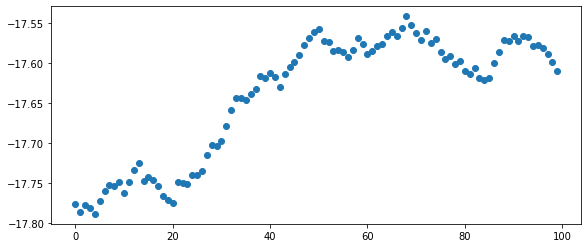

In [5]:
_,ax = plt.subplots(figsize=(9.5,4))
# ax.scatter(range(1000), height_cal[::10])
ax.scatter(range(100), z_distance2)

### Test multiple harmonics fit

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal
import random

import h5py
from IPython.utils import io

In [7]:
import sys
sys.path.append('../../../../nadavp/new_trap/Tools/')
sys.path.append('../../../../nadavp/new_trap/Tools/StatFramework/')
import BeadDataFile
from discharge_tools import *

In [8]:
from likelihood_calculator import likelihood_analyser
from likelihood_calculator import GravityFramework
from likelihood_calculator import auxiliary_functions as aux
gfw = GravityFramework.GravityFramework()

sys.path.append('/home/analysis_user/New_trap_code/SensitivityFramework/')
from signal_model_utilities import *

In [295]:
%matplotlib notebook

In [10]:
%reload_ext autoreload
%autoreload 2

In [11]:
dist = 11.4
z_sep = -10
y_offset = 4.9
test = force_vs_time(dist*1e-6,z_sep*1e-6,200e-6,3,"z",10e-6, yuk_or_grav="yuk",offset_y=y_offset*1e-6, 
                     alpha=1e8, bead_size=3.8e-6)

Your choice of lambda is not existing
Taking 1.00e-05 for lambda
order
A bead size of 3.80e-06 is selected
3.8e-06
3.8e-06
A bead size of 3.80e-06 is selected
3.8e-06
posvec
A bead size of 3.80e-06 is selected
3.8e-06
A separation of 1.10e-05 is selected
A height of -1.00e-05 is selected


In [58]:
ll = likelihood_analyser.LikelihoodAnalyser()

In [99]:
bb = np.array(test[1])*1.85/1.55
x = np.array(test[1]*10)*1.85/1.55

freqs_signal2 = 3*np.array([12, 11, 4, 6, 7,13,9,8])

mm = ll.find_mle_multiHarmoincs(x=x, template=bb,scales=[1], signal_freqs=freqs_signal2, bandwidth=1, decimate=1)

../../../../nadavp/new_trap/Tools/StatFramework/likelihood_calculator/likelihood_analyser.py:226: InitialParamWarning: Parameter A does not have initial value. Assume 0.
  mimuit_minimizer = Minuit(self.log_likelihood_multi_harmonics, **kwargs)
../../../../nadavp/new_trap/Tools/StatFramework/likelihood_calculator/likelihood_analyser.py:226: InitialParamWarning: Parameter A is floating but does not have initial step size. Assume 1.
  mimuit_minimizer = Minuit(self.log_likelihood_multi_harmonics, **kwargs)
../../../../nadavp/new_trap/Tools/StatFramework/likelihood_calculator/likelihood_analyser.py:226: InitialParamWarning: Parameter phi does not have initial value. Assume 0.
  mimuit_minimizer = Minuit(self.log_likelihood_multi_harmonics, **kwargs)
../../../../nadavp/new_trap/Tools/StatFramework/likelihood_calculator/likelihood_analyser.py:226: InitialParamWarning: Parameter phi is floating but does not have initial step size. Assume 1.
  mimuit_minimizer = Minuit(self.log_likelihood_mul

In [100]:
mm.values

<ValueView of Minuit at 150b0b198>
  A: 0.0
  phi: 0.0

In [74]:
ll.harmoincs_amp, ll.harmoincs_phases, len(ll.data_y)

(array([[3.63707654e-18],
        [3.18383584e-18],
        [3.52059270e-18],
        [2.92305266e-18],
        [2.50609267e-18],
        [1.72758447e-18],
        [1.58099221e-18],
        [1.02136221e-18]]),
 array([[1.57079633e+00],
        [3.14159265e+00],
        [1.57079633e+00],
        [4.71238898e+00],
        [6.66133815e-16],
        [3.14159265e+00],
        [3.14159265e+00],
        [4.71238898e+00]]),
 8)

In [75]:
bdf_discharge = load_dir(dirname='/data/new_trap/20200320/Bead1/Discharge/Discharge_after_Mass_20200402/After_spinning_again_20200403/',
                         start_file=0, max_file=1000)

530  files in folder
530  files loaded


In [77]:
bdf_z = bdf_discharge[235:265]

In [79]:
fname = r'/data/new_trap/20200320/Bead1/TransFunc/Repeat_TransFunc_20200104/TransFunc_X_m300k_250s_1hz.h5'
tf_x = BeadDataFile.BeadDataFile(fname)
fname = r'/data/new_trap/20200320/Bead1/TransFunc/Repeat_TransFunc_20200104/TransFunc_Y_m300k_250s_1hz.h5'
tf_y = BeadDataFile.BeadDataFile(fname)
fname = r'/data/new_trap/20200320/Bead1/TransFunc/Repeat_TransFunc_20200104/TransFunc_Z_m300k_250s_1hz.h5'
tf_z = BeadDataFile.BeadDataFile(fname)
gfw.build_transfer_function([tf_x, tf_y, tf_z], base_freq=1, number_of_harmonics=90, scale_freq=71, plot=False)

No height data
No cantilever data
Error loading spinning data
No height data
No cantilever data
Error loading spinning data
No height data
No cantilever data
Error loading spinning data


In [83]:
m1_zscale = gfw.build_z_response(bdf_z[:2], drive_freq=71, charges=6, bandwidth=1, decimate=10)

***************************************************
Z2-amplitude:  2.71e+02
reduced chi2:  136.04073198396662
***************************************************
Z2-amplitude:  2.63e+02
reduced chi2:  208.9254941103403
Z2 response (amplitude): 267.1767304386702


In [307]:
## 10 files of shaking data for nose floor
data_bdfs = load_dir(dirname='/data/new_trap/20200320/Bead1/Shaking/Shaking378/',
                         file_prefix='Shaking3', start_file=0, max_file=1000)

10000  files in folder
1000  files loaded


In [133]:
fit_kwargs = {'A': 1, 'f': 36, 'phi': np.pi/2,
              'error_A': 0.1, 'error_f': 1, 'error_phi': 0.5, 'errordef': 1,
              'limit_phi': [0, 2 * np.pi],
              'limit_A': [0.000, 1000],
              'print_level': 0, 'fix_A': False, 'fix_f': True, 'fix_phi': True}
gfw.get_z_amplitude(bdf=data_bdfs[0], noise_rms=1, decimate=10, bandwidth=1, **fit_kwargs)[2].values

***************************************************
Z2-amplitude:  0.00e+00
reduced chi2:  95.67351693389422


<ValueView of Minuit at 7c487888>
  A: 0.0
  f: 36.0
  phi: 1.5707963267948966

In [253]:
signal_freqs = [33, 36]
freqs_signal2 = 3*np.array([12, 11, 4, 6, 7,13,9,8])
scales = [gfw.scale_Z2]*2
fit_kwargs = {'A': 10, 'phi': 0.2,
              'error_A': 0.1, 'error_phi': 0.5, 'errordef': 1,
              'limit_phi': [0, 2 * np.pi],
              'limit_A': [-1000, 1000],
              'print_level': 0, 'fix_A': False, 'fix_phi': True}
mm = ll.find_mle_multiHarmoincs(x=data_bdfs[9].z2, template=bb, scales=scales, signal_freqs=signal_freqs, bandwidth=20, decimate=1, **fit_kwargs)

A =  10.0 phi =  0.2 res =  353.33285489219986
A =  10.000999999996566 phi =  0.2 res =  353.33317486842054
A =  9.99899999999343 phi =  0.2 res =  353.33253494710567
A =  10.00999999951648 phi =  0.2 res =  353.3360560549898
A =  9.989999999483416 phi =  0.2 res =  353.3296568418394
A =  -0.28044086828026593 phi =  0.2 res =  351.68840843857066
A =  -0.20692982543312155 phi =  0.2 res =  351.68848937019254
A =  -0.35395190961196477 phi =  0.2 res =  351.68849571569734
A =  -0.28044086828026593 phi =  0.2 res =  351.68840843857066
A =  -0.20692982543312155 phi =  0.2 res =  351.68848937019254
A =  -0.35395190961196477 phi =  0.2 res =  351.68849571569734
A =  -0.2657386598193625 phi =  0.2 res =  351.6884111681969
A =  -0.29514307668057427 phi =  0.2 res =  351.68841243729577


In [239]:
mm.values, mm.values[0]

(<ValueView of Minuit at 4671618>
   A: -3.3557349711246616
   phi: 1.5707963267948966,
 -3.3557349711246616)

In [305]:
freqs_signal2 = 3*np.array([12, 11, 4, 6, 7,13,9,8])
mms2 = []

for i in range(8):
    print(i)
    scales = [gfw.scale_Z2]*(i+1)
    signal_freqs = freqs_signal2[:i+1]
    fit_kwargs = {'A': 10, 'phi': 0.2,
                  'error_A': 0.1, 'error_phi': 0.5, 'errordef': 1,
                  'limit_phi': [0, 2 * np.pi],
                  'limit_A': [-1000, 1000],
                  'print_level': 0, 'fix_A': False, 'fix_phi': True}

    mm = []
    for bdf_ in data_bdfs:
        mm.append(ll.find_mle_multiHarmoincs(x=bdf_.z2, template=bb, scales=scales, signal_freqs=signal_freqs, 
                                         bandwidth=20, decimate=10, **fit_kwargs).values[0])
    mms2.append(mm)

0
1
2
3
4
5
6
7


<IPython.core.display.Javascript object>


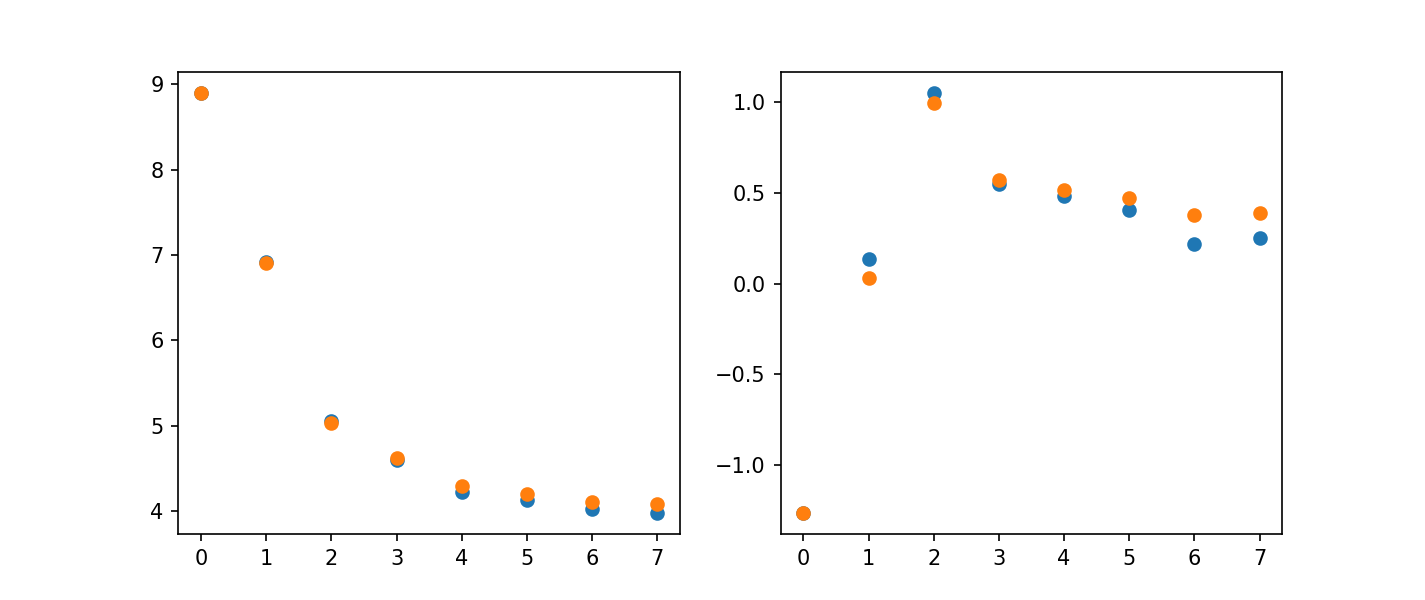

In [306]:
mm_std = [np.std(mm_) for mm_ in mms]
mm_mean = [np.mean(mm_) for mm_ in mms]
mm_std2 = [np.std(mm_) for mm_ in mms2]
mm_mean2 = [np.mean(mm_) for mm_ in mms2]
_,ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].scatter(range(8), mm_std)
ax[0].scatter(range(8), mm_std2)
ax[1].scatter(range(8), mm_mean)
ax[1].scatter(range(8), mm_mean2)

In [426]:
freqs_signal2 = 3*np.array([12, 11, 4, 6, 7,13,9,8])
scales = [gfw.scale_Z2]*8

mm4 = []

fit_kwargs = {'A': 0, 'phi': 0.2,
              'error_A': 1, 'error_phi': 0.5, 'errordef': 1,
              'limit_phi': [0, 2 * np.pi],
              'limit_A': [-1000, 1000],
              'print_level': 0, 'fix_A': True, 'fix_phi': True}

for i,bdf_ in enumerate(data_bdfs):
    print(i, end='...')
    mm4.append(ll.find_mle_multiHarmoincs(x=bdf_.z2, template=bb, scales=scales, signal_freqs=freqs_signal2, 
                                     bandwidth=2, decimate=1, **fit_kwargs))

0...1...2...3...4...5...6...7...8...9...10...11...12...13...14...15...16...17...18...19...20...21...22...23...24...25...26...27...28...29...30...31...32...33...34...35...36...37...38...39...40...41...42...43...44...45...46...47...48...49...50...51...52...53...54...55...56...57...58...59...60...61...62...63...64...65...66...67...68...69...70...71...72...73...74...75...76...77...78...79...80...81...82...83...84...85...86...87...88...89...90...91...92...93...94...95...96...97...98...99...100...101...102...103...104...105...106...107...108...109...110...111...112...113...114...115...116...117...118...119...120...121...122...123...124...125...126...127...128...129...130...131...132...133...134...135...136...137...138...139...140...141...142...143...144...145...146...147...148...149...150...151...152...153...154...155...156...157...158...159...160...161...162...163...164...165...166...167...168...169...170...171...172...173...174...175...176...177...178...179...180...181...182...183...184...

In [442]:
sum(np.array(logL)>2.706), sum(np.array(logL2)>2.706/2)

(92, 92)

<IPython.core.display.Javascript object>


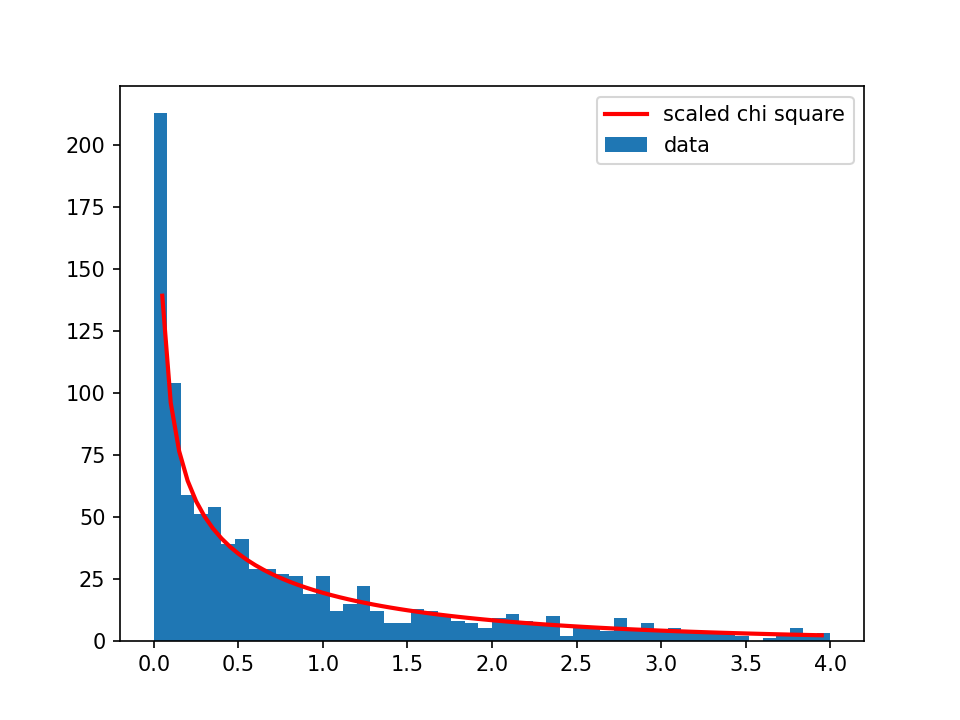

In [448]:
import scipy.stats as stats

logL = [2*(mm4_.fval-mm5_.fval) for mm4_, mm5_ in zip(mm4, mm5)]
_,ax = plt.subplots()
ax.hist(logL, bins=50, range=(0,4), alpha=1, log=False, label='data')
# ax.hist(logL2, bins=50, range=(0,4), alpha=0.6, log=True, label='decimate 10')
x = np.arange(0, 4, .05)
plt.plot(x, stats.chi2.pdf(x, df=1)*1000/50*4, color='r', lw=2, label='scaled chi square')
ax.legend()

<IPython.core.display.Javascript object>


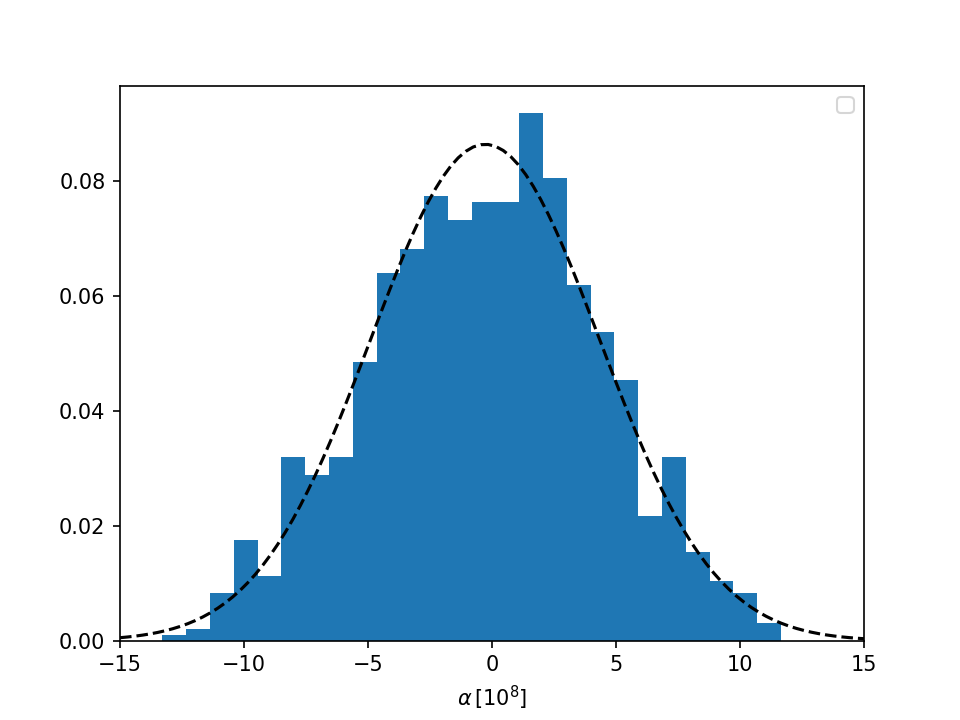

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Legend does not support 'Fit' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Legend does not support 'Data' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  from ipykernel import kernelapp as app


In [454]:
_,ax = plt.subplots()
# best fit of data

data = mm3
avg = np.mean(data)
var = np.var(data)
# From that, we know the shape of the fitted Gaussian.
pdf_x = np.linspace(-15,15,100)
pdf_y = 1.0/np.sqrt(2*np.pi*var)*np.exp(-0.5*(pdf_x-avg)**2/var)

# Then we plot :
ax.hist(data, bins=30, density=True)
ax.set(xlim=(-15,15), xlabel=r'$\alpha \,[10^{8}]$')
ax.plot(pdf_x,pdf_y,'k--')
ax.legend(("Fit","Data"),"best")